## Cohen's d vs p values!

In this notebook we will compare the stability of cohens d vs p values for a typical experiment. We will create two sample distributions that represent two populations of size 10,000 each. We will then simulate 50 experiments in which we will draw random samples of 50 from each populations and compare the samples with cohen's d and ttests. We will show that the variability in the interpretation of the p values can sway from being interpreted as significant to not significant. Whereas the variation in the interpretation of cohens d changes minimally. 

First we will load the necessary library (ggplot2) and set up the variables that will control the sample size and number of simulated experiments.

In [ ]:
library(ggplot2)
options(jupyter.plot_mimetypes = 'image/png')

iters = 50
sample_size = 50


Here we create two simulated populations with a normal distribution. One population has a mean of 0 and standard deviation of 1 and the other population has a mean of 0.5 and a standard deviation of 1.

In [2]:
data = data.frame(cond = factor(rep(c('A', 'B'), each=10000)), 
                  rating = c(rnorm(10000), rnorm(10000, mean=0.5)))


Plot the distributions to get a sense of what they look like and how much overlap there is between them.

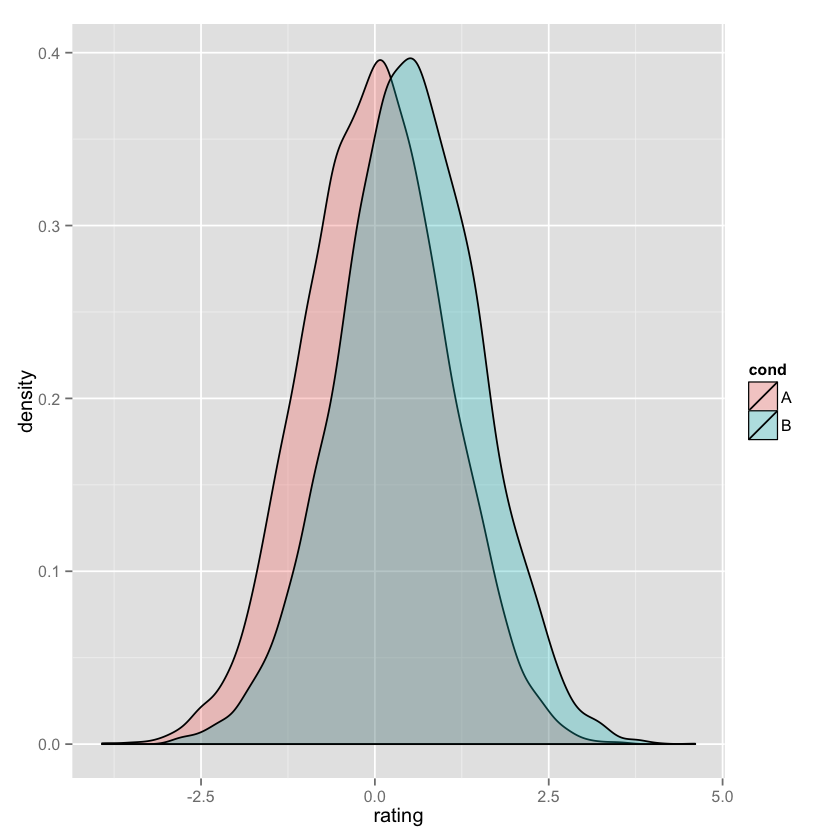

In [4]:
p = ggplot(data, aes(x=rating, fill=cond)) + geom_density(alpha=.3)
print(p)

Here we will set up the cohen's d function. It takes two inputs, the data for group1 and the data for group2. Cohen's d is a widely used standardized measure of effect size. It is calculated by taking the differences of two means and expressing that difference over a standardizer of some kind. Here we are using a pooled variance as our standardizer.

$$ (M_a - M_b) / s $$

The choice of standardizer will change depending on the question being asked. But, cohen's d is essentially a type of z score. 

In [28]:
cohens <- function(group1, group2){
  difference = mean(group1) - mean(group2)
  
  n1 = length(group1)
  n2 = length(group2)
  
  var1 = var(group1)
  var2 = var(group2)
  
  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = abs(difference / sqrt(pooled_var))  
}

Calculate and save the 'true' values of cohen's d and p values to compare with our simulated experiments later. The p value is very highly super mega siginificant because the 'sample sizes' are so big (exploiting this property of a p values leads to what is known as 'p value hacking'). As we will see later, cohen's d is less influenced by the size of the 'samples' it is being calculated for.

In [35]:
true_d = cohens(data$rating[data$cond == 'A'], data$rating[data$cond == 'B'])
print(true_d)

[1] 0.490194


In [36]:
true_p = t.test(data$rating[data$cond == 'A'], data$rating[data$cond == 'B'])$p.value
print(true_p)

[1] 1.048797e-255


In [37]:
p_values = matrix(,nrow=iters)
cohens_d = matrix(,nrow=iters)

for (i in 1:iters) {
  sample_a = sample(data$rating[data$cond == 'A'], size = sample_size, replace=F)
  sample_b = sample(data$rating[data$cond == 'B'], size = sample_size, replace=F)

  d = cohens(sample_a, sample_b)
  cohens_d[i] = d - true_d
  
  p = t.test(sample_a, sample_b)$p.value
  p_values[i] = p - true_p
}

In [38]:
print(mean(p_values))
print(mean(cohens_d))

[1] 0.09049985
[1] -0.02797448
